# Table of contents

[1. Which regions have the lowest and highest prices of Avocado ?](#Question_no1) </br>
[2. What region with highest produciton of Avocado ?](#Question_no2)<br>
[3. What is the average avocado price in each year ?] <br>
[4. What is th averagge avocado volume in each year ?] <br>


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
df = df.drop(['Unnamed: 0', 'Date', '4046', '4225', '4770'], axis = 1)
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [29]:
def get_average(df,column):
    return sum(df[column]) / len(df)

def get_average_between_two_columns(df, column1, column2):
    
    lst = list(df[column1].unique())
    average = []
    for i in lst:
        x = df[df[column1] == i] 
        column1_average = get_average(x,column2)
        average.append(column1_average)
    
    df_column1_column_2 = pd.DataFrame({'column1':lst, 'column2':average})       
    column1_column_sorted_index = df_column1_column_2.column2.sort_values(ascending=False).index.values
    column1_column_sorted_data = df_column1_column_2.reindex(column1_column_sorted_index)
    
    return column1_column_sorted_data

In [41]:
def plot(data, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x = data.column1, y = data.column2, palette = "Spectral", hue = data.column1 , legend=False)
    plt.xticks(rotation  = 90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Average {ylabel} of Avocado according to {xlabel}")

<a id="Question_no1"></a>
### Which regions have the lowest and highest prices of Avocado

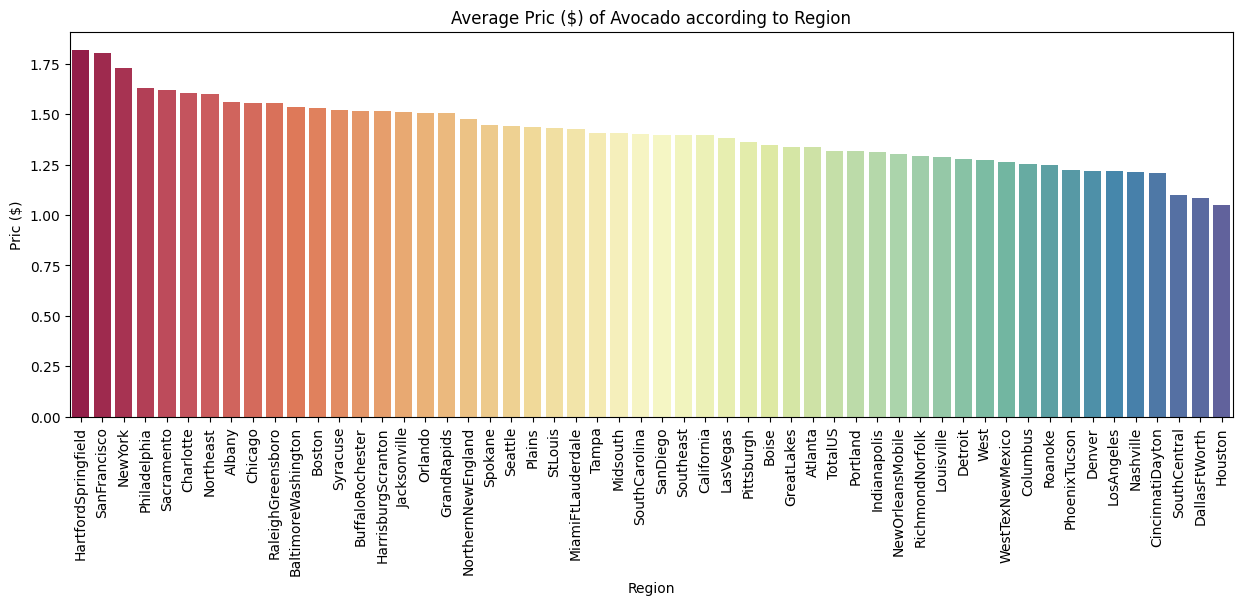

In [42]:
data = get_average_between_two_columns(df, "region", "AveragePrice")
plot(data, "Region", "Pric ($)")

In [43]:
data

,column1,column2
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


- HartfordSpringfield is the region with the highest average price of Avocado
- Houston is the region with lowest average prices 

<a id = "Question_no2"></a>
### What region with highest produciton of Avocado